### Mount the drive with the colab notebook to access the content in the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/diabetes.csv')
df.head() #head shows 1st 5 datasets if argument is null

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras==3.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


## The python Library we used are :

<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>scipy</li>
<li>Seaborn</li>
<li>Keras</li>
<li>Sklearn</li>

</ul>

<b>Numpy : </b> NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. <br>
<b>Pandas : </b> In Python programming language for data manipulation and analysis Pandas is widely Used . In particular, it offers data structures and operations for manipulating numerical tables and time series.<br>
<b>SciPy : </b>It  is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.<br>
<b>Seaborn : </b> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br>
<b> Keras : </b> Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. <br>
<b> Sklearn : </b>  Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and  Matplotlib! The functionality that scikit-learn provides include:
<ul>
<li>Regression</li>
<li>Classification</li>
<li>Model selection
Preprocessing</li>




### Loading of different packagaes and APIs

In [ ]:
import numpy as np
np.random.seed(6)

import random
random.seed(6)

from keras import backend as K
import tensorflow as tf
tf.random.set_seed(6)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA, FastICA
from sklearn import preprocessing

# Use keras.utils.to_categorical instead of tflearn.data_utils.to_categorical
from keras.utils import to_categorical

from scikeras.wrappers import KerasClassifier  # Updated import

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Model

# Ensure that seaborn, matplotlib, and pandas are set up
sns.set(style="whitegrid")
%matplotlib inline

warnings.filterwarnings('ignore')


### Utility Functions

In [ ]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=20            #random initializer
n_dots=50
##########################################################

for i in range(8):
  #for renaming dataset of columns features F1 -- F8
  Renamed_feature.append('F'+str(i+1))
############################################################

# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(data):
  '''
  This function will create a grid of Axes such that each variable
  in data will by shared in the y-axis across a single row and in the x-axis
  across a single column.The diagonal Axes are treated differently, drawing
  a plot to show the univariate distribution of the data for the variable in
  that column.
  Parameters :
  Input - data is the pandas type variable for
  plotting pair plot of features in this
  dataframe

  Output :
  This function Plot pairwise relationships in a dataset.

  '''
  plt.figure()

  pair_plot =sns.pairplot(data=data,
                          height=3,
                          hue='Outcome',
                          diag_kind='kde')
  # fig.suptitle("Pairplot of all features")
  pair_plot.fig.suptitle("Pairplot of all features")
  plt.show()




###################################################################
# this function for Gaussian distribution plot
# and box plot simultaneously in a figure
def Box_Gaussian(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The Gaussian distribution plot for
  eight feature of input data

  '''

  fig=plt.figure(figsize=(15,6))                                #define figure size
  fig.suptitle("Box Gaussian plot of all features")

  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(data)                  #pass into function for standrd.
  for i in range(8):                                        #loop for all 8 feature

    plt.subplot(2, 4, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #boxplot  with green shaded area
                                                            # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
                                                            # https://seaborn.pydata.org/generated/seaborn.boxplot.html
    plt.gca().invert_yaxis()                                #Reverse Y-Axis in PyPlot
    # plt.title('F'+str(i+1))
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
                                                            # https://matplotlib.org/api/tight_layout_api.html
    # plt.grid('on')

    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
#############################################################


def plot_confusionMatrix(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output -visualization of correalation matrix of
  input data

  '''
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Confusion Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell.
              linecolor="black")                              #Color of the lines that will divide each cell.
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show()



############################################################
# this function plot univariate distribution of
# every feature

def dist_Plot(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The distribution plot for
  eight feature of input data

  '''
  fig, ax = plt.subplots(2,4, figsize=(12,5))                 #set numbers of rows and columns of subplot
  sns.set()
  sns.distplot(data.F1, bins = 10, ax=ax[0,0])                #Flexibly plot a univariate distribution of observations.
  sns.distplot(data.F2, bins = 10, ax=ax[0,1])
  sns.distplot(data.F3, bins = 10, ax=ax[0,2])
  sns.distplot(data.F4, bins = 10, ax=ax[0,3])
  sns.distplot(data.F5, bins = 10, ax=ax[1,0])
  sns.distplot(data.F6, bins = 10, ax=ax[1,1])
  sns.distplot(data.F7, bins = 10, ax=ax[1,2])
  sns.distplot(data.F8, bins = 10, ax=ax[1,3])
  fig.suptitle("Gaussian Distribution of all features")
  fig.tight_layout()                                          #This module provides routines to adjust subplot params
                                                              #  so that subplots are nicely fit in the figure.


############################################################
# this function plot violin plot  of
# every feature


def plot_violinplot (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The violinplot plot for
  eight feature of input data

  '''

  # A violin plot is a method of plotting numeric data.
  # It is similar to box plot with a rotated kernel
  # density plot on each side. Violin plots are similar
  # to box plots, except that they also show the probability
  # density of the data at different values (in the simplest
  # case this could be a histogram).
  fig, ax = plt.subplots(2,4, figsize=(12,6))
  # #set numbers of rows and columns of subplot and figure size
  sns.set()
  sns.violinplot(x = data.Outcome, y=data.F1,  ax=ax[0,0])    #violine plot for F1 feature
  sns.violinplot(x = data.Outcome, y=data.F2,  ax=ax[0,1])    #violine plot for F2 feature
  sns.violinplot(x = data.Outcome, y=data.F3,  ax=ax[0,2])    #violine plot for F3 feature
  sns.violinplot(x = data.Outcome, y=data.F4,  ax=ax[0,3])    #violine plot for F4 feature
  sns.violinplot(x = data.Outcome, y=data.F5,  ax=ax[1,0])    #violine plot for F5 feature
  sns.violinplot(x = data.Outcome, y=data.F6,  ax=ax[1,1])    #violine plot for F6 feature
  sns.violinplot(x = data.Outcome, y=data.F7,  ax=ax[1,2])    #violine plot for F7 feature
  sns.violinplot(x = data.Outcome, y=data.F8,  ax=ax[1,3])    #violine plot for F8 feature
  fig.suptitle("Violin plot of all features")
  fig.tight_layout()

                                                              # https://seaborn.pydata.org/generated/seaborn.violinplot.html

############################################################


#this function  is for manual outleir rejection
def Manual (data):

    '''
    Parameters :
    Input - data is the pandas type variable

    Return - dataframe with outleir rejection
    of input data

    '''
    # input dataset is data
    max_Pregnancies = data.F1.max()                         #maximum feature of F1
    data = data[data.F1!=max_Pregnancies]                   #find  where extreme value is absent and remove extreme
    max_Glucose = data.F2.max()                             #maximum feature of F2
    data = data[data.F2!=max_Glucose]                       #find  where extreme value is absent and remove
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element
      min_Glucose = data.F2.min()                           #find minimum
      data = data[data.F2!=min_Glucose]                     #reject minimum
    max_BloodPressure = data.F3.max()                       #maximum feature of F3
    data = data[data.F3!=max_BloodPressure]                 #find  where extreme value is absent and remove
    for i in range(2):                                      #in this loop we succesively remove 2 extreme element
      max_skinthickness = data.F4.max()
      data = data[data.F4!=max_skinthickness]
    for i in range(25):                                     #in this loop we succesively remove 25 extreme element
      max_Insulin = data.F5.max()
      data = data[data.F5!=max_Insulin]
    max_bmi = data.F6.max()
    data = data[data.F6!=max_bmi]
    for i in range(4):                                      #in this loop we succesively remove 4 minimum element
      min_bmi = data.F6.min()
      data = data[data.F6!=min_bmi]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element
      max_DiabetesPedigreeF = data.F7.max()
      data = data[data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                     #in this loop we succesively remove 20 extreme element
      max_age = data.F8.max()
      data = data[data.F8!=max_age]
      df =data
    return data

############################################################

# this function if for outlair rejection with
# respect to mean value
def IQR_Mean (data):


  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with mean
  of input data

  '''
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                   # Q1 is the "middle" value in the first half of the rank-ordered data set.
    Q3 = x.quantile(0.75)                                   # Q3 is the "middle" value in the second half of the rank-ordered data set.
    IQR = Q3-Q1                                             # The interquartile range is equal to Q3 minus Q1.
    mean = x.mean()                                         #mean of feature
    for j in range(569):                                    # loop for first 569 elements of feature
      temp = x[j]                                           # every feature value
      LW = (Q1 - 1.5 * IQR)                                 #lower considerable range of gaussian distribution
      UW = (Q3 + 1.5 * IQR)                                 #upper considerable range of gaussian distribution
      if temp < LW:                                         #replace upper value with mean
        x[j] = mean
      if temp > UW:                                         #replace lower value with mean
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

############################################################
# this function if for outlair rejection with
# respect to median value same as previous function
def IQR_Median (data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  filled with median
  of input data

  '''
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                                # find the median
    for j in range(569):                                    #replace the first 569 values with respect to median
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                         #replace upper value with median
        x[j] = median
      if temp > UW:
        x[j] = median                                       #replace upper value with median
    data[Renamed_feature[i]] = x
  return data

############################################################



# this function if for outlair rejection with
# 1.5 times of IQR that means that are
# significant in gaussian distribution
def IQR (data):

  '''
  Parameters :
  Input - data is the pandas type variable

  Return - dataframe with outleir rejection
  of input data

  '''
  #input dataset as data
  for i in range(8):                                        # for every feature
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             #find IQR
    LW = (Q1 - 1.5 * IQR)                                   #find lower boundary
          # print(LW)
    UW = (Q3 + 1.5 * IQR)                                   #find upper boundary
          # print(UW)
    data = data[data[Renamed_feature[i]]<UW]                #drop greater than upper limit
    data = data[data[Renamed_feature[i]]>LW]                #drop smaller than lower limit

  return data


############################################################
#outlier rejection with different condition

def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  '''
  Parameters :
  Input -
  data is the pandas type variable
  iqr_Mean - for outleir rejection with Mean
  iqr_Medain- for outleir rejection with Medain
  iqr- for drop the outleir
  manual -for manual rejection
  Return - dataframe with outleir rejection
  filled with Input parameter

  '''

  # outlier_Rejection with conditional input
  if iqr_Mean == True:                                     #reject outleir with Mean
    data = IQR_Mean (data)
  if iqr_Medain == True:                                   #reject outleir with Median
    data = IQR_Medain (data)
  if iqr == True:                                          #reject outleir in IQR range
    data = IQR (data)
  if manual == True:                                       #reject outleir with manual
    data = Manual (data)

  return data

############################################################

#data plot on different input condition
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):

  '''
  Parameters :
  Input -
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data
  Dist_Plot- for gaussian distribution plot visualization of input  data
  Plot_violinplot- for violin plot visualization of input  data
  Plot_confusionMatrix -for confusion matrix visualization of input  data

  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################
def replace_zero(data, field, target):

    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]


############################################################
def metrics (y_true, y_pred, probas_):


  '''
  Parameters :
  Input -
  y_true - true  value of input data
  y_pred- predicted  value of input data
  probas_- probability/confidence of predicted output

  return -True Negative(tn),False Positive(fp),False Negative(fn)
  True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
  True positive rate(tpr)

  '''


  points=n_dots*'-'
  print(points)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = roc_auc_score(Y_Test, probas_[:, 1])
  #  aucs.append(roc_auc)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr

############################################################


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  '''
  Parameters :
  mean_fpr - Mean False positive rate
  tprs -values of true positive rate
  aucs  - values of auc
  TP    - True positive
  TN    - True Negative
  FP    - False Positiv
  FN    - False Negative

  Output -
  Visalization of TPR vs FPR plot
  '''
  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  # mean_auc = auc(mean_fpr, mean_tpr)
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  # plt.figure(figsize=(8, 5))
  # plt.grid(True)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  # Setting the background color
  ax.set_facecolor("white")

  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000')
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  # plt.grid(True)
  plt.show()

############################################################
def plot_Current_ROC(fpr,tpr,iterator,roc_auc):

  '''
  Parameters :
  Input -
  fpr - False positive rate
  tpr - True positive rate
  roc_auc -auc values of roc curve

  Output -
  Visalization of current roc curve

  '''
  plt.plot(fpr,

          tpr,
          # Color[iterator],
          alpha=0.35,
          # label='macro-average ROC (AUC = {0:0.3f})'.format(roc_auc)
          # +FOLD[iterator],
          linewidth=1)

############################################################
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  '''
  Parameters :
  Input -
  X_Train -train data
  Y_Train - label/output of train data
  tuned_parameters =parameters of models
  verbose = condition about model

  Output -
  Returned a tuned classifier using grid search
  '''
  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf
############################################################

def average_performance(aucs,Accuracy,TP,TN,FP,FN):

  '''
  Parameters :
  Input -
  aucs= values of aucs
  Accuracy - value of accuracy
  TP  - True Positive
  TN  - True Negative
  FP  - False Positive
  FN  - False Negative


  Output -
  It prints the average aucs,accuarcy,confusion matrix
  '''

  print()
  n_dotsav=(n_dots-len('Average'))//2

  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)

############################################################
#this  function is for algorithm based feature selection
def feature_Selector(data, algo, n_feature):
    '''
    Parameters :
    Input -
    data - It is the pandas type variable
    algo - type of algorith PCA,ICA,Correlation


    Output -
    It prints the average aucs,accuarcy,confusion matrix
    '''
    if algo=='PCA':                                                   #for pca algorithm
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                             #number of feature
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12)
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo =='corr':                                                   #for ica algorithm
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]                #for 4 feature
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]       #for 6 feature
            return data.iloc[:,:6].values, data.iloc[:,6:].values

    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values            #if feature selection is off all features are counted


def run (hLayer,
         batch_size = [32],
         epochs = [100],
         learn_rate = [0.001],
         dropout_rate = [0.3],
         activation = ['relu'],
         init =['normal']):
    """
    Input : hidden layer number
    and others are alwalys constant

    Output : optimized model with best number of neuron
    in every layer
    """


    if hLayer==1:

        ###########################################
        #  number of neurons  for every layer
        #  optimization
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        ############################################


        #############################################
        # parameter dictionary for grid search#
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2)
        ###############################################

        ###############################################
        # model building function for given parameters#
        def nn_opt_1(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2):
            """
            Input : activation ,dropout_rate,init,learn_rate,neuron1,neuron2

            Output : Using input hyper_parameters build model and return it
            """

            #####################################################################
            ##               model initialization and building block           ##
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

            #####################################################################

            return model

        ########################### grid search for optimisaion #############################
        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_1, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        ########################################################################################

        ########################################################################################
        ##                  build model with optimized parameters                             ##
        model =nn_opt_1(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'])
        ########################################################################################

        #  return best parameters and model
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results


    if hLayer==2:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3)

        def nn_opt_2(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_2, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_2(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==3:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4)

        def nn_opt_3(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_3, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_3(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==4:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5)

        def nn_opt_4(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_4, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_4(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==5:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6)

        def nn_opt_5(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_5, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_5(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results


    if hLayer==6:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        neuron7 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6,
                          neuron7=neuron7)

        def nn_opt_6(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6,
                   neuron7):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron7, input_dim = neuron6, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_6, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_6(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'],
                grid_results.best_params_['neuron7'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==7:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        neuron7 = [16, 32, 64]
        neuron8 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6,
                          neuron7=neuron7,
                          neuron8=neuron8)

        def nn_opt_7(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6,
                   neuron7,
                   neuron8):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron7, input_dim = neuron6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron8, input_dim = neuron7, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_7, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_7(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'],
                grid_results.best_params_['neuron7'],
                grid_results.best_params_['neuron8'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==8:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        neuron7 = [16, 32, 64]
        neuron8 = [16, 32, 64]
        neuron9 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6,
                          neuron7=neuron7,
                          neuron8=neuron8,
                          neuron9 =neuron9)

        def nn_opt_8(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6,
                   neuron7,
                   neuron8,
                   neuron9):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron7, input_dim = neuron6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron8, input_dim = neuron7, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron9, input_dim = neuron8, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_8, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_8(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'],
                grid_results.best_params_['neuron7'],
                grid_results.best_params_['neuron8'],
                grid_results.best_params_['neuron9'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==9:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        neuron7 = [16, 32, 64]
        neuron8 = [16, 32, 64]
        neuron9 = [16, 32, 64]
        neuron10 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6,
                          neuron7=neuron7,
                          neuron8=neuron8,
                          neuron9=neuron9,
                          neuron10=neuron10)

        def nn_opt_9(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6,
                   neuron7,
                   neuron8,
                   neuron9,
                   neuron10 ):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron7, input_dim = neuron6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron8, input_dim = neuron7, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron9, input_dim = neuron8, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron10, input_dim = neuron9, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_9, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_9(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'],
                grid_results.best_params_['neuron7'],
                grid_results.best_params_['neuron8'],
                grid_results.best_params_['neuron9'],
                grid_results.best_params_['neuron10'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results

    if hLayer==10:
        neuron1 = [16, 32, 64]
        neuron2 = [16, 32, 64]
        neuron3 = [16, 32, 64]
        neuron4 = [16, 32, 64]
        neuron5 = [16, 32, 64]
        neuron6 = [16, 32, 64]
        neuron7 = [16, 32, 64]
        neuron8 = [16, 32, 64]
        neuron9 = [16, 32, 64]
        neuron10 = [16, 32, 64]
        neuron11 = [16, 32, 64]
        param_grid = dict(batch_size=batch_size,
                          epochs=epochs,
                          learn_rate=learn_rate,
                          dropout_rate=dropout_rate,
                          activation=activation,
                          init=init,
                          neuron1=neuron1,
                          neuron2=neuron2,
                          neuron3=neuron3,
                          neuron4=neuron4,
                          neuron5=neuron5,
                          neuron6=neuron6,
                          neuron7=neuron7,
                          neuron8=neuron8,
                          neuron9 =neuron9,
                          neuron10=neuron10,
                          neuron11 =neuron11)

        def nn_opt_10(activation,
                   dropout_rate,
                   init,
                   learn_rate,
                   neuron1,
                   neuron2,
                   neuron3,
                   neuron4,
                   neuron5,
                   neuron6,
                   neuron7,
                   neuron8,
                   neuron9,
                   neuron10,
                   neuron11):
            model = Sequential()
            model.add(Dense(neuron1, input_dim = 6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron6, input_dim = neuron5, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron7, input_dim = neuron6, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron8, input_dim = neuron7, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron9, input_dim = neuron8, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron10, input_dim = neuron9, kernel_initializer= init, activation= activation))
            model.add(Dense(neuron11, input_dim = neuron10, kernel_initializer= init, activation= activation))
            model.add(Dropout(dropout_rate))
            model.add(Dense(2, activation='softmax'))
            optimizer = Adam(learning_rate = learn_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            return model

        grid = GridSearchCV(estimator = KerasClassifier(build_fn = nn_opt_10, verbose = 0),
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
        grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

        model =nn_opt_10(grid_results.best_params_['activation'],
                grid_results.best_params_['dropout_rate'],
                grid_results.best_params_['init'],
                grid_results.best_params_['learn_rate'],
                grid_results.best_params_['neuron1'],
                grid_results.best_params_['neuron2'],
                grid_results.best_params_['neuron3'],
                grid_results.best_params_['neuron4'],
                grid_results.best_params_['neuron5'],
                grid_results.best_params_['neuron6'],
                grid_results.best_params_['neuron7'],
                grid_results.best_params_['neuron8'],
                grid_results.best_params_['neuron9'],
                grid_results.best_params_['neuron10'],
                grid_results.best_params_['neuron11'])
        return grid_results.best_params_['batch_size'], grid_results.best_params_['epochs'], model, grid_results





################################################################
#           this function optimize four hyper-parameters are
#           activation,dropout_rate,init,learn_rate            #
def nn_opt(activation,dropout_rate,init,learn_rate):
    """
  Parameters :
  Input - list of 4 hyper-parameter that are need to
  be optimized

  Output - Best optimized model
    """

    #define the optimmized neuron  number from experiment
    neuron1,neuron2,neuron3,neuron4=64,16,64,64
    ###############################################################################################
    # the model building block

    model = Sequential()
    np.random.seed(6)
    model.add(Dense(neuron1, input_dim =4 , kernel_initializer= init, activation= activation))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
    model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
    model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

    optimizer = Adam(learning_rate = learn_rate)               #optimizer of Neural network
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #compile model
    #################################################################################################
    return model




### Helper function for Ensembling model

### Read the data from the drive using pandas (Python Data Analysis Library)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ML_Dataset/diabetes.csv')
data.head() #head shows 1st 5 datasets if argument is null

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head(n=6)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

### Renaming the Features by F1, F2, and so on ......
---
New Name | Original Name | Comments|
---|---|---|
F1|Pregnancies|Number of times pregnant|
F2|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
F3|BloodPressure|Diastolic blood pressure (mm Hg)|
F4|SkinThickness|Triceps skin fold thickness (mm)|
F5|Insulin|2-Hour serum insulin (mu U/ml)|
F6|BMI|Body mass index (weight in kg/(height in m)^2)|
F7|DiabetesPedigreeFunction|Diabetes pedigree function|
F8|Age|Age (years)|




In [ ]:
data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8','Outcome']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])


### Show the statistical description of the data which sumarize the central tendency, dispersion, and shape of a data distribution.



In [ ]:
data.describe()

F1          F2          F3          F4          F5          F6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.843750   59.322917   21.264323   15.535156   42.417969  112.104167   
std      3.364678   30.510176    8.688687   13.111648   52.689353   59.651199   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   37.000000   16.000000    0.000000    0.000000   69.000000   
50%      3.000000   55.000000   22.000000   16.000000    8.500000  109.000000   
75%      6.000000   78.250000   27.000000   25.000000   80.250000  153.000000   
max     16.000000  135.000000   46.000000   50.000000  185.000000  247.000000   

               F7          F8     Outcome  
count  768.000000  768.000000  768.000000  
mean   230.515625   12.227865    0.348958  
std    143.031938   11.712724    0.476951  
min      0.000000    0.000000    0.000000  
25%    113.750000    3.000000    0.000000  
50%    208.500000    8.000000    0.000000  
75%    349.250000   20.000000    1.000000  
max    516.000000   51.000000    1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   F1       768 non-null    int64
 1   F2       768 non-null    int64
 2   F3       768 non-null    int64
 3   F4       768 non-null    int64
 4   F5       768 non-null    int64
 5   F6       768 non-null    int64
 6   F7       768 non-null    int64
 7   F8       768 non-null    int64
 8   Outcome  768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


# Raw Data Plot and Presenation
**Plot pairwise relationships in a dataset:**
* The diagonal shows the distribution of the dataset with the kernel density plots of both the classes.

* The scatter-plots shows the relation between each and every attribute or features taken pairwise where the scatter-plots shows that no attributes are able to clearly distinguish the two outcome.

**Distribution Plot:**

Dist Plot helps us to flexibly plot a univariate distribution of observations.

**Violin Plots:**
A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram).

**Correlation:**
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

<Figure size 640x480 with 0 Axes>

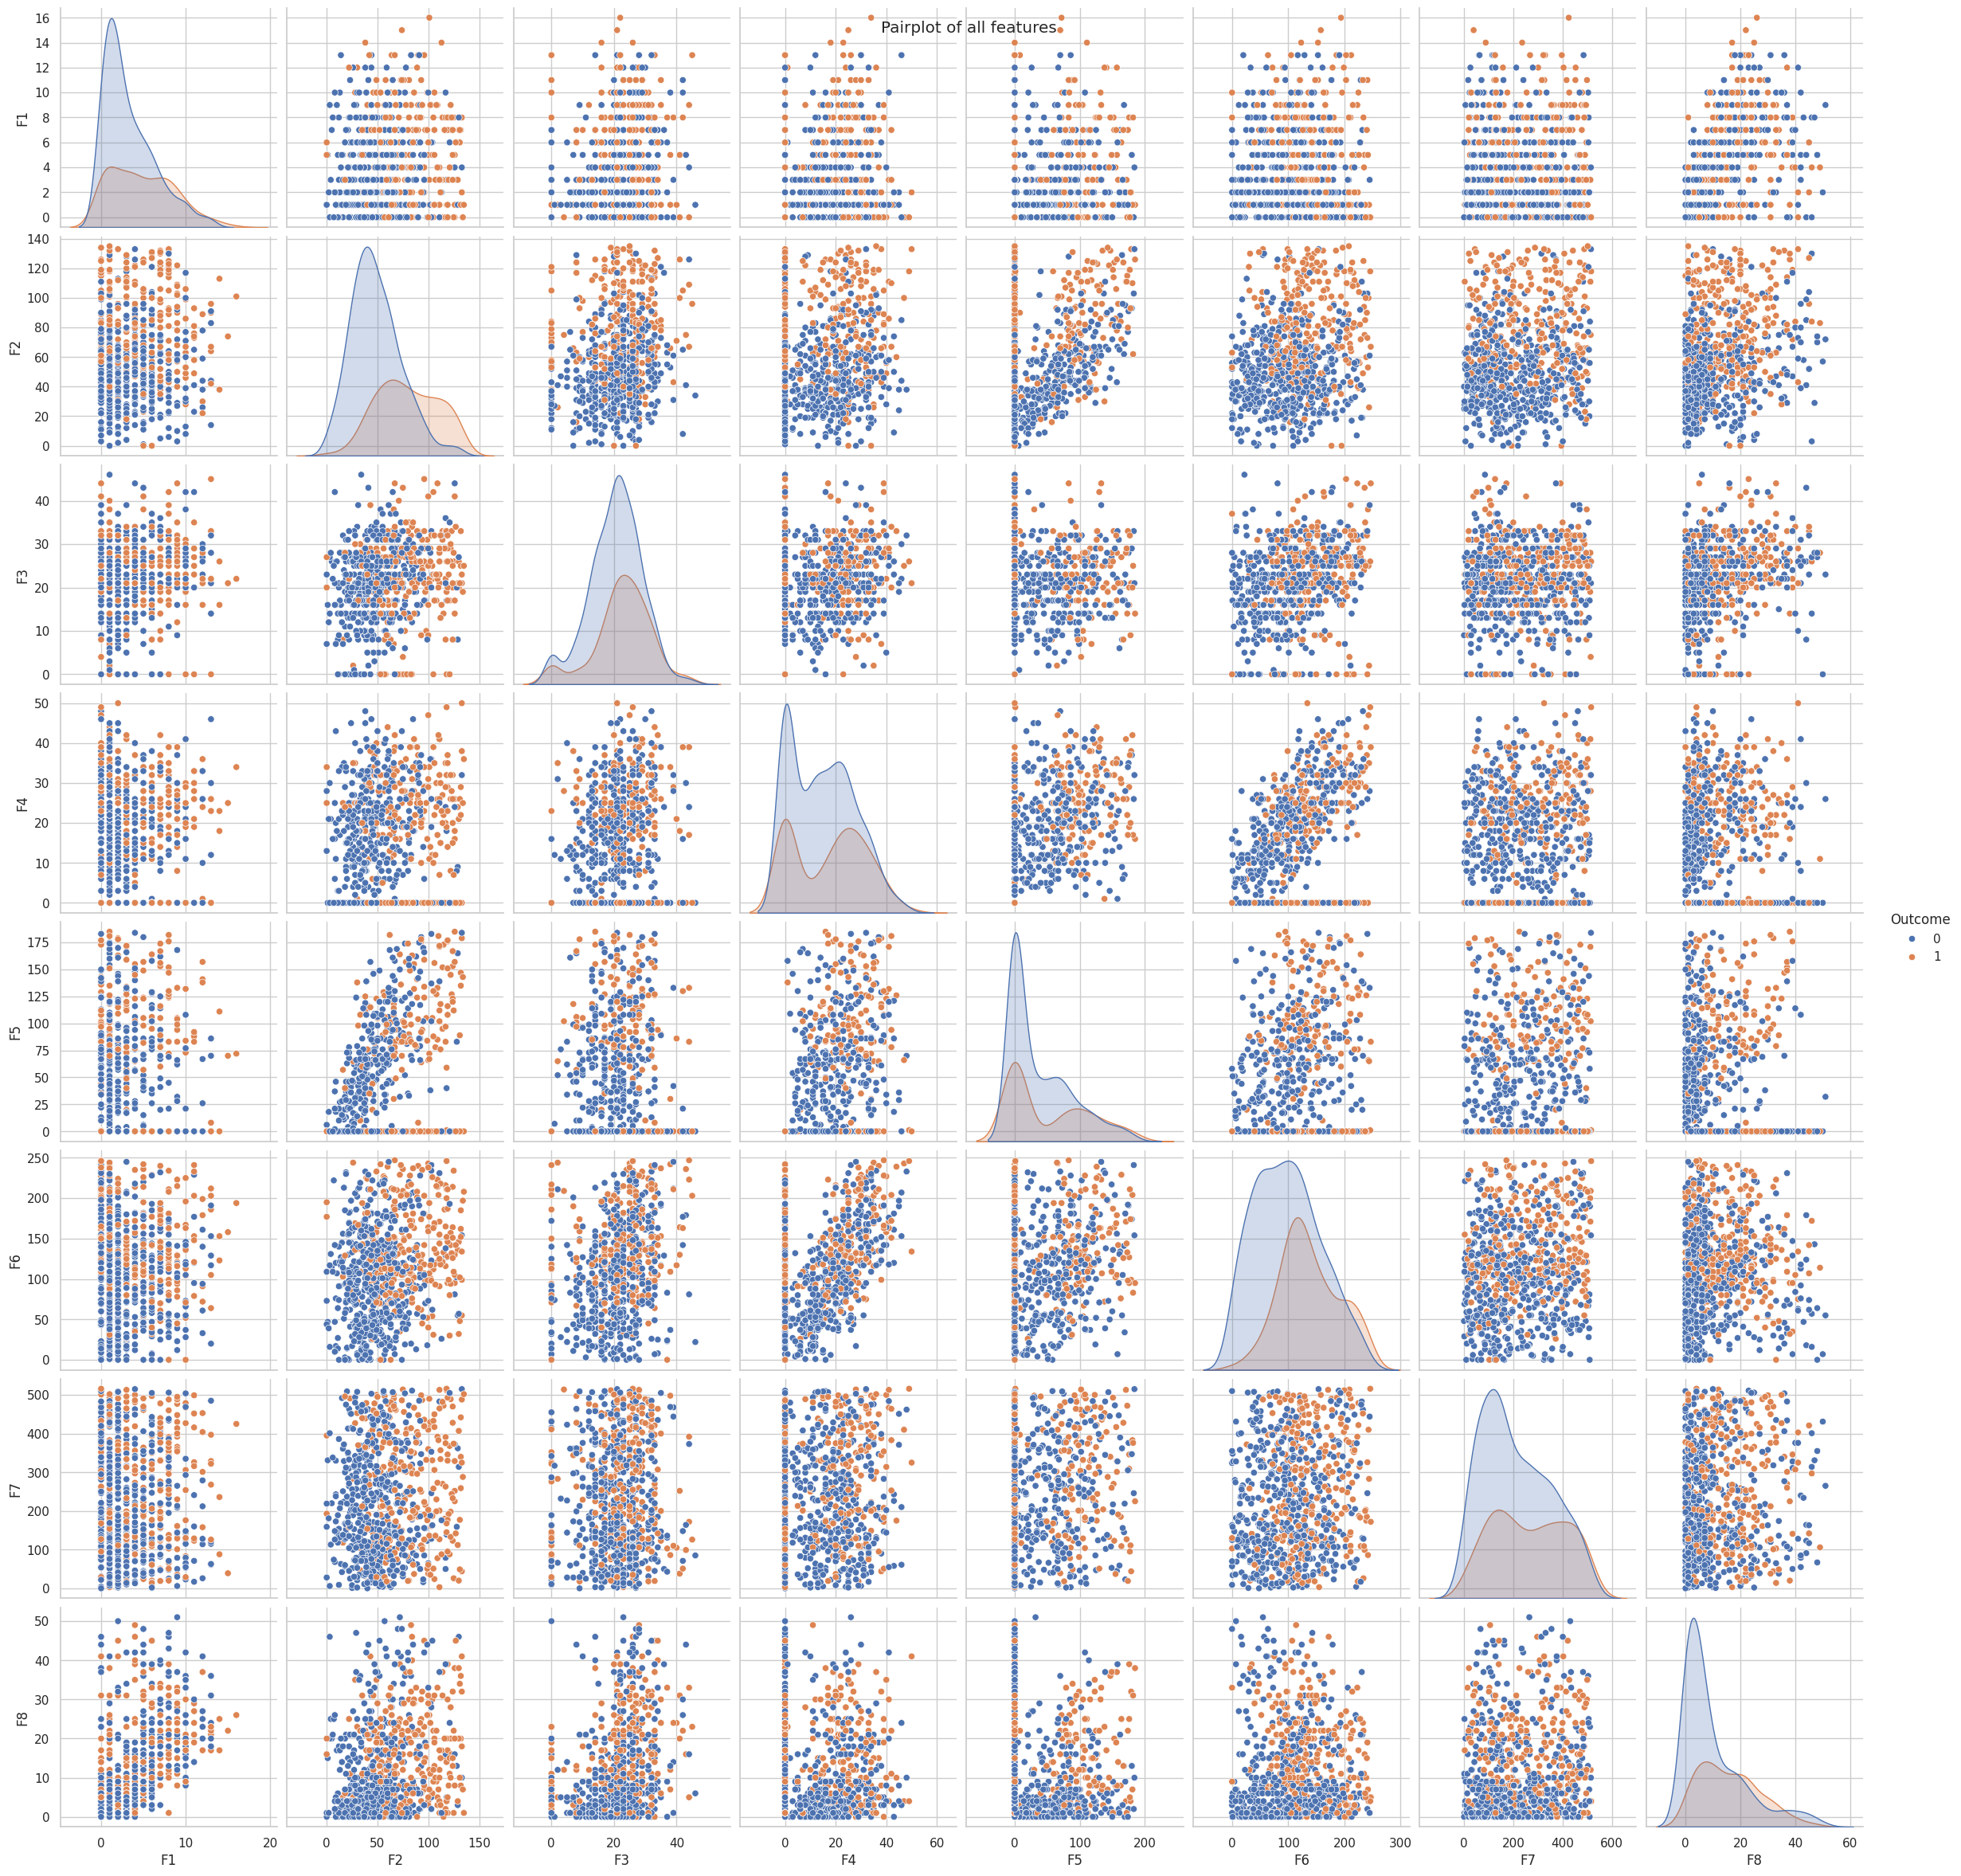

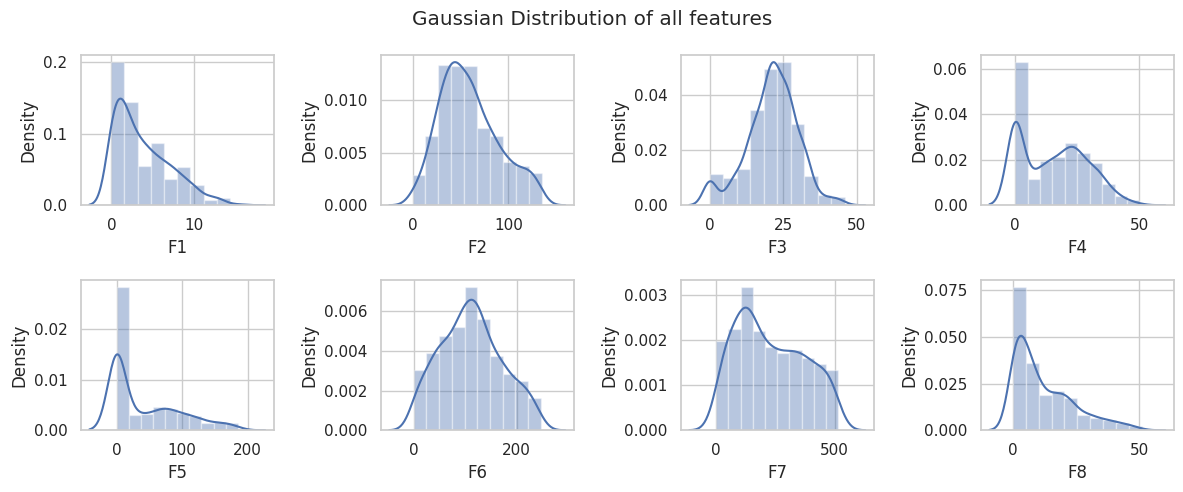

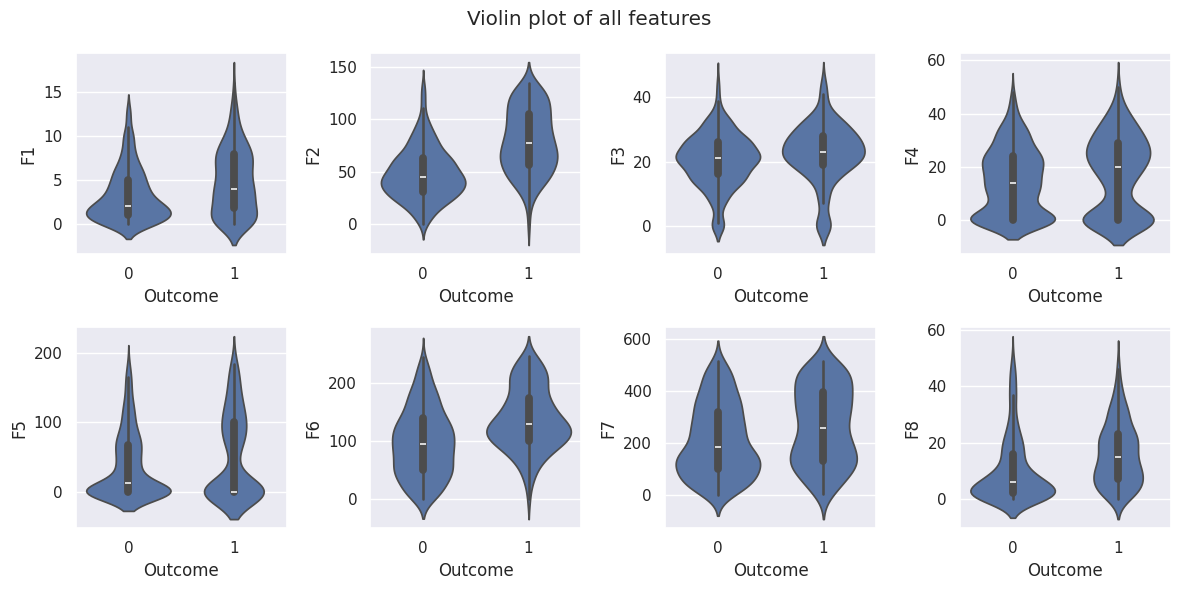

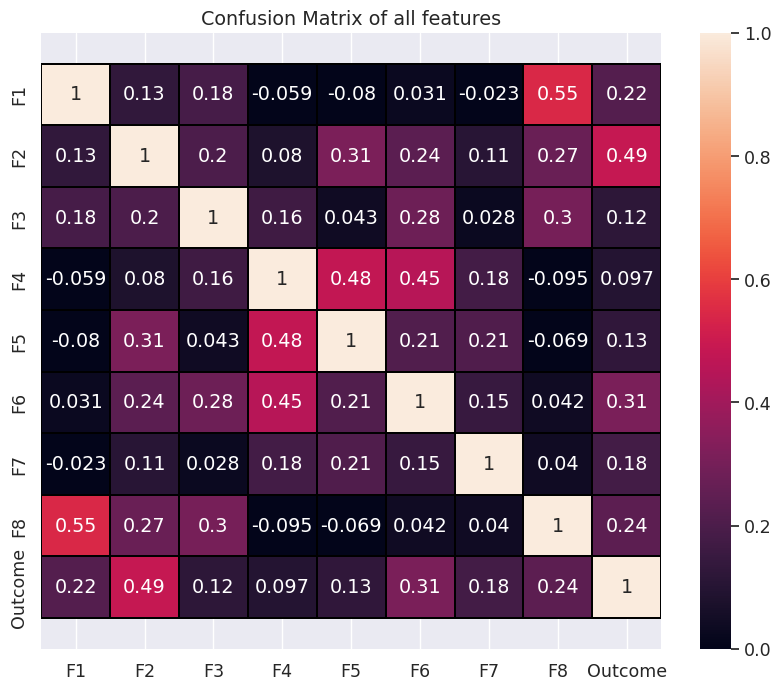

In [ ]:
data_plot (data,
           Pair_plot=True,
           Dist_Plot=True,
           Plot_violinplot=True,
           Plot_confusionMatrix=True,
           box_Gaussian=False)

# Data Preprocessing  

### Preprocessing Selection
---
Process Selector | Preprocessing |
---|---|
P|Outlier Rejection|
Q|Filling Missing Value|
R|Standardization|

**Each P, Q, and R process has four techniques for feature selection which are N/A, PCA, ICA, and correlation-based feature selection**

In [ ]:
data['F2']=le.fit_transform(data['F2'])
data['Outcome']=le.fit_transform(data['Outcome'])

In [ ]:
print('Shape Before Process: ' + str(data.shape))

# The process for the outlier rejection (P)
data = outlier_Rejection (data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('Shape After outlier Removed: ' + str(data.shape))

## The process for the filling missing values (Q)
for col in ['F2', 'F3', 'F4', 'F5', 'F6']:
    replace_zero(data, col, 'Outcome')
print('Shape After Filling Missing Value: ' + str(data.shape))


X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=4)
print('Shape After Feature Selection: ' + str(X_Data.shape))


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Data = scaler.fit_transform(X_Data)
Y_Lavel = scaler.fit_transform(Y_Lavel)

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=random_initializer)

Shape Before Process: (587, 9)
Shape After outlier Removed: (544, 9)
Shape After Filling Missing Value: (544, 9)
Shape After Feature Selection: (544, 4)


# Processed Data Plot and Presenation

<Figure size 640x480 with 0 Axes>

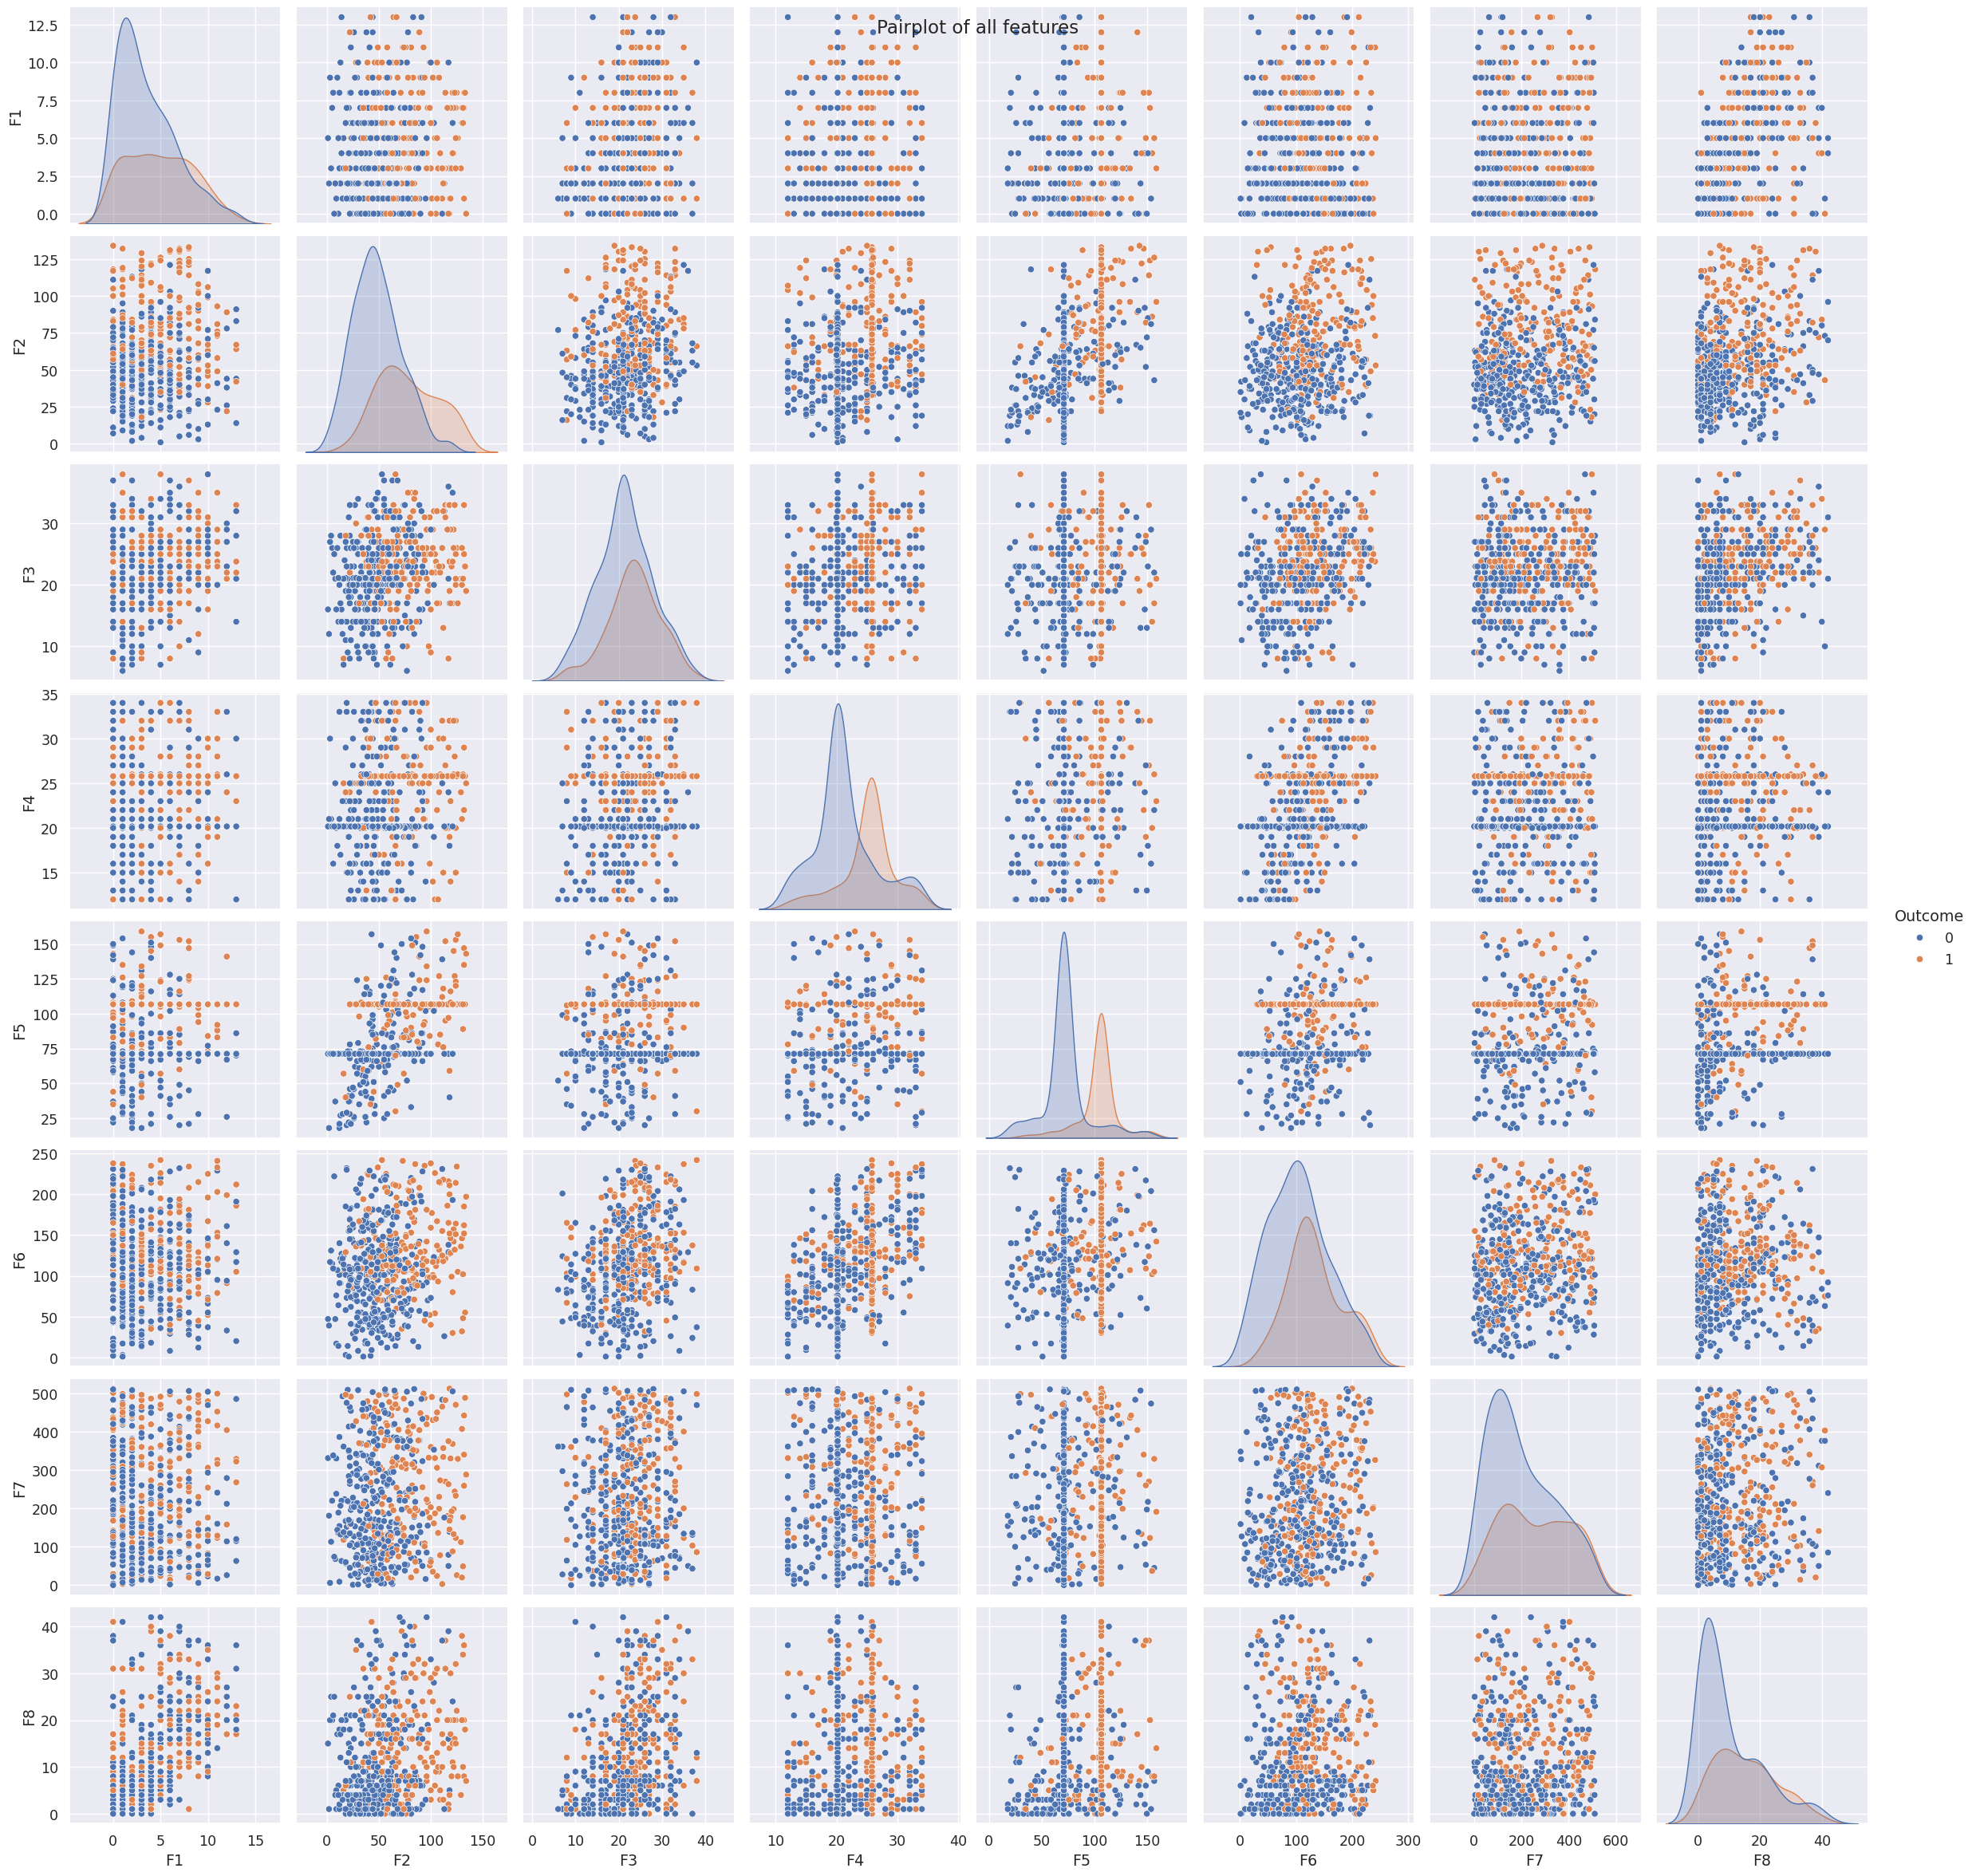

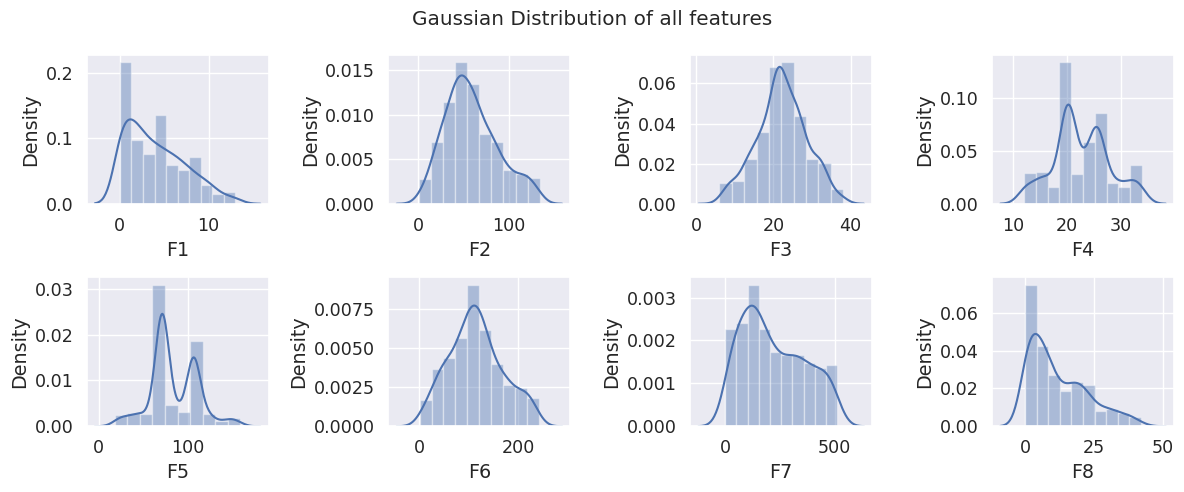

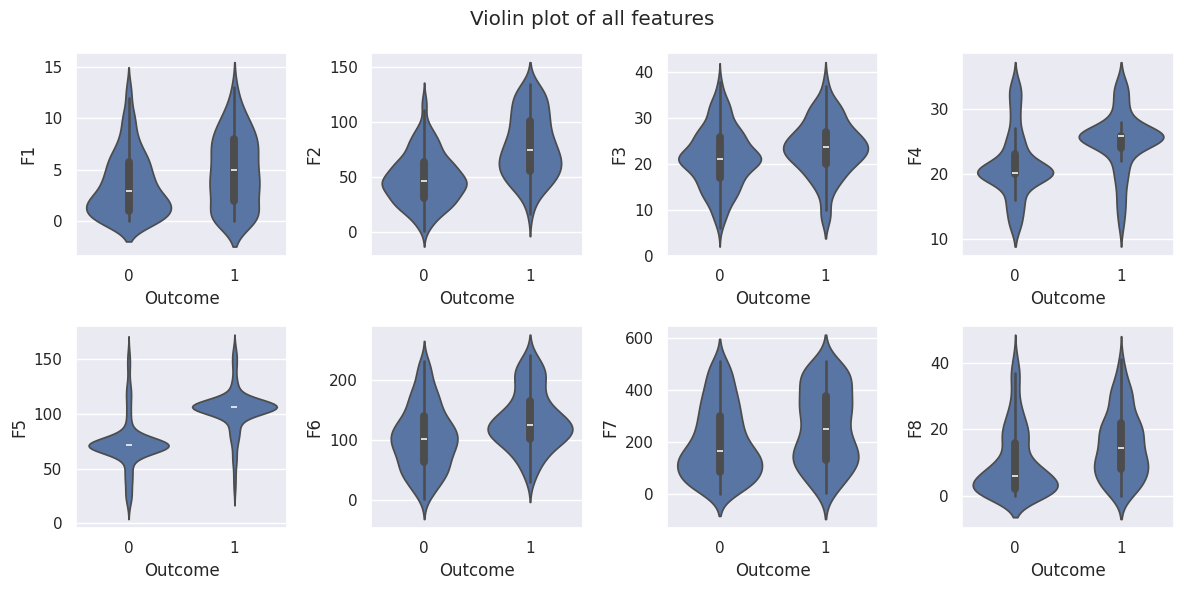

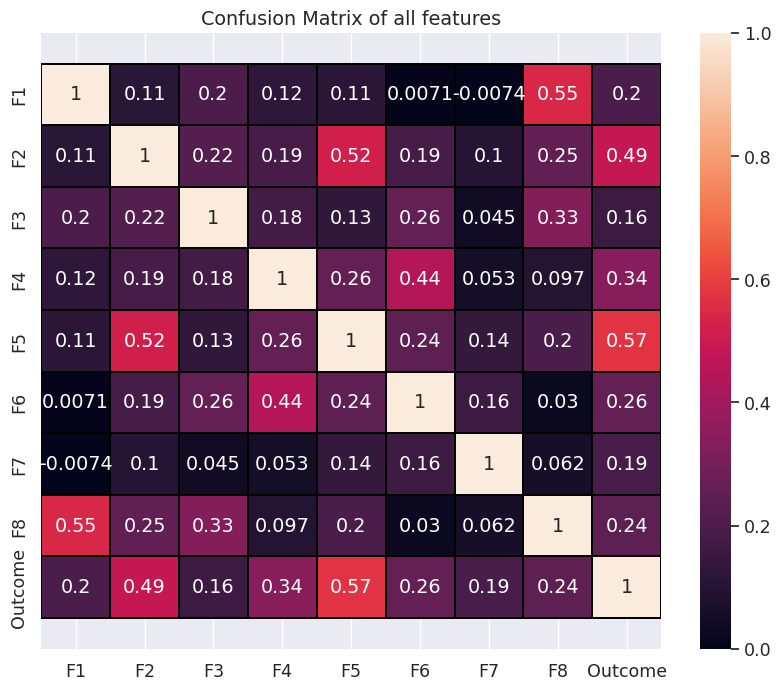

In [ ]:
data_plot (data,
          Pair_plot=True,
          Dist_Plot=True,
          Plot_violinplot=True,
          Plot_confusionMatrix=True,
          box_Gaussian=False)


### MLP Experiment Block


In [ ]:
A  neural network (NN) is an artificial neural network (ANN) with multiple layers between the input and output layers. The NN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship. For the
comparison of performance between ML classifiers we find the best peformance using Neural Network.At first we find out the optimum number of hidden layer and number of neuron in every layer. Then, Using grid search technique we optimze the hyperparameters(Number of epoch, batch size, learning rate, droupt out rate , activation afunction , kernel initializer) of NN model .

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


#### Find the optimum number of hidden layers and neurons in number every layer

------------------------------Model Running with # of Hidden = 1-----------------------------
No GridSearchCV results
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Accuracy: 0.9117647058823529
AUC: 0.9696093886845332
------------------------------Model Running with # of Hidden = 2-----------------------------
No GridSearchCV results
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9375
AUC: 0.9764699013253927
------------------------------Model Running with # of Hidden = 3-----------------------------
No GridSearchCV results
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9430147058823529
AUC: 0.9826735563729784
------------------------------Model Running with # of Hidden = 4-----------------------------
No GridSearchCV results
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9301470588235294
AUC: 0.975491913353185
------------------------------Model Running with # of Hidden = 5-----------------------------
No GridSearchCV results
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accura

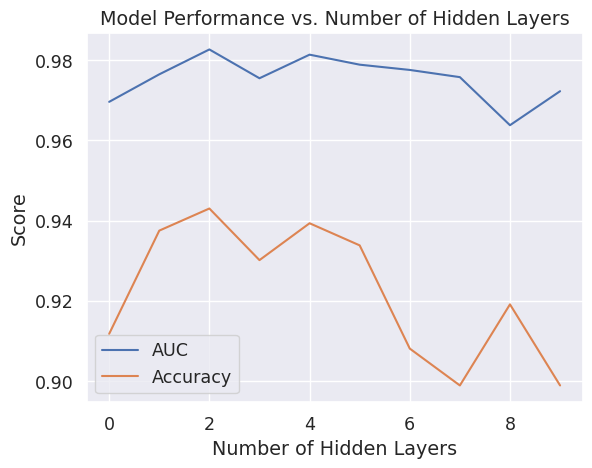

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score

# Example function definition for `run`
def run(hLayer, batch_size, epochs, learn_rate, dropout_rate, activation, init):
    # Define and compile the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_Data.shape[1], activation=activation[0], kernel_initializer=init[0]))
    for _ in range(hLayer):
        model.add(Dense(64, activation=activation[0], kernel_initializer=init[0]))
        model.add(Dropout(dropout_rate[0]))
    model.add(Dense(2, activation='softmax'))

    optimizer = Adam(learning_rate=learn_rate[0])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Placeholder for GridSearchCV or hyperparameter tuning (if applicable)
    grid_results = None  # Replace with actual GridSearchCV result if applicable

    return batch_size, epochs, model, grid_results

# Initialize lists for storing accuracy and AUC values
accuracy = []
AUC = []

# Optimize the number of hidden layers and neurons
for hLayer in range(1, 11):
    print('------------------------------Model Running with # of Hidden = ' + str(hLayer) + '-----------------------------')

    batch_size, epochs, model, grid_results = run(hLayer=hLayer,
                                                   batch_size=[32],
                                                   epochs=[100],
                                                   learn_rate=[0.001],
                                                   dropout_rate=[0.3],
                                                   activation=['relu'],
                                                   init=['normal'])

    print(grid_results.best_params_ if grid_results else "No GridSearchCV results")

    # Convert labels to one-hot encoding
    Y_Train_1Hot = to_categorical(Y_Lavel, num_classes=2)

    # Fit the model
    model.fit(x=X_Data, y=Y_Train_1Hot, batch_size=batch_size[0], epochs=epochs[0], verbose=0)

    # Make predictions
    probas_ = model.predict(X_Data)
    y_pred = np.argmax(probas_, axis=1)

    # Print and store the optimized model accuracy and AUC
    Y_Lavel_binary = np.where(Y_Lavel > 0.5, 1, 0) # Assuming a threshold of 0.5 for binary classification
    acc = accuracy_score(Y_Lavel_binary, y_pred)

    if len(Y_Lavel.shape) == 1:  # If Y_Lavel is not one-hot encoded
      _Train_1Hot = to_categorical(Y_Lavel, num_classes=2)

    auc = roc_auc_score(Y_Train_1Hot, probas_)

    print("Accuracy:", acc)
    print("AUC:", auc)

    accuracy.append(acc)
    AUC.append(auc)

# Plot the values of AUC and accuracy
plt.plot(AUC, label='AUC')
plt.plot(accuracy, label='Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Score')
plt.legend()
plt.title('Model Performance vs. Number of Hidden Layers')
plt.show()


In [ ]:
##########################
# Define a random seed
seed = 6
np.random.seed(seed)
###########################



# create the model for optimization
model = KerasClassifier(build_fn = nn_opt, verbose = 0)

##########################################################
##List of hyper-parameters of MLP model for optimization##

batch_size = [8, 16, 32]
epochs = [100, 150, 200]
learn_rate =[0.001,.05, 0.1]
dropout_rate = [0.0, 0.3, 0.6]
activation = ['relu', 'tanh']
init =['uniform', 'normal']

###########################################################

###########################################################
## parameter dictionary for grid ssearch   ##
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  learn_rate=learn_rate,
                  dropout_rate=dropout_rate,
                  activation=activation,
                  init=init)

#build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
###########################################################


relu 8 200 0.001 0.6 normal 64 16 64 64
------------------->>>>>>>>>>Fold no =  1
Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6214 - loss: 0.6803
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 0.4494
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.3887
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3654
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8878 - loss: 0.3666
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.3512
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3675
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8834 - loss: 0.3445
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.3372
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.3521
Epoch 11/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

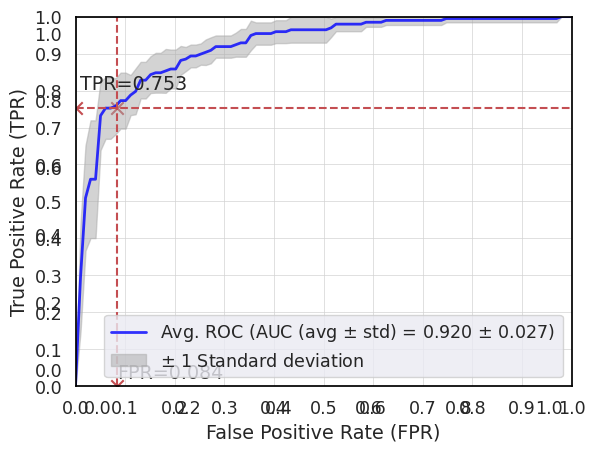


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.920 +/- 0.027
Accuracy (Avg. +/- Std.) is  0.857 +/- 0.025
Avg. CM is [[29, 5], [9, 63]]
Total for all folds CM is [[149, 29], [49, 317]]
Sensitivity (Avg. +/- Std.) is  0.753 +/- 0.092
Specificity (Avg. +/- Std.) is  0.916 +/- 0.034
Precision (Avg. +/- Std.) is  0.842 +/- 0.046
FOR (Avg. +/- Std.) is  0.131 +/- 0.042
DOR (Avg. +/- Std.) is  42.060 +/- 15.233


In [ ]:
i=0                                                                          # for verification of fold number
Accuracy = []                                                                # for store the value of accuracy
FP = []                                                                      # for store False Positive
TN = []                                                                      # for True Negative
FN = []                                                                      # for False Negative
TP = []                                                                      # for True Positive
tprs = []                                                                    # for true positive rates
aucs_ens = []                                                                # for store the values of auc
sn = []                                                                      # for sensitivity
sp = []                                                                      # for specificity
pr = []                                                                      # for precision
FOR = []                                                                     # for False omission rate
DOR = []
iterator=0
mean_fpr = np.linspace(0, 1, 100)


#########################################################

##      call grid  search for optimization       ##

# grid_results = grid.fit(X_Data, to_categorical(Y_Lavel,2))

##            tuned/optimized parameters        ##

# activation=grid_results.best_params_['activation']
# batch_size=grid_results.best_params_['batch_size']
# epochs=grid_results.best_params_['epochs']
# learn_rate=grid_results.best_params_['learn_rate']
# dropout_rate=grid_results.best_params_['dropout_rate']
# init=grid_results.best_params_['init']

##########################################################


##########################################################
##     best optimizers found  are defined here by experiment ##
activation="relu"
batch_size=8
epochs=200
learning_rate=.001
dropout_rate=0.6
init="normal"
neuron1,neuron2,neuron3,neuron4=64,16,64,64
############################################################
print(activation,batch_size,epochs,learn_rate,dropout_rate,init,
    neuron1,neuron2,neuron3,neuron4)


Y_Lavel = np.where(Y_Lavel > 0.5, 1, 0) # Assuming a threshold of 0.5 for binary classification
for train_index, test_index in kf.split(X_Data,Y_Lavel.ravel()):                  # for k fold experiment
  print('------------------->>>>>>>>>>Fold no = ',i+1)
  X_Train, X_Test = X_Data[train_index], X_Data[test_index]               # the train data and label
  Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]             # the  test data and label


  Y_Train_1Hot = to_categorical(Y_Train,2)                                #convert train output to catagorical
  Y_Test_1Hot = to_categorical(Y_Test,2)                                  #convert test output to catagorical

  model = nn_opt(activation,                                               #build model using tuned parameters
            dropout_rate,
            init,
            learning_rate)
  np.random.seed(6)
  model.fit(x=X_Train,                                                     # fit our model
            y=Y_Train_1Hot,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=False,
            verbose=1)

  probas_ = model.predict(X_Test)                                           #predict the class probability

  y_pred = np.argmax(model.predict(X_Test), axis=1)                         #find the max. probability of output class


  tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           #evaluation parameters of ensembelled model
                                              y_pred = y_pred,
                                              probas_ = probas_)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  aucs_ens.append(roc_auc)
  plot_Current_ROC (fpr,tpr,iterator,roc_auc)                             #plot the ROC curve of current fold
  iterator += 1
  TN.append(tn)
  FP.append(fp)
  FN.append(fn)
  TP.append(tp)
  Accuracy.append(accuracy_score(Y_Test, y_pred))
  sn.append(tp/(tp+fn))
  sp.append(tn/(fp+tn))
  pr.append(tp/(tp+fp))
  FOR.append(fn/(tn+fn))
  DOR.append((tp*tn)/(fp*fn))
  print((tp*tn)/(fp*fn))
  i+=1

average_ROC(mean_fpr,tprs,aucs_ens,TP,TN,FP,FN)                             #plot average ROC
average_performance(aucs_ens,Accuracy,TP,TN,FP,FN)                          #print the average performance
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))